In [193]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy.stats import norm, shapiro
import pylab
import pandas_profiling
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures,MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm
from sklearn.utils import shuffle

In [76]:
mathematics = pd.read_csv('./data/student_mat.csv')
portuegese = pd.read_csv('./data/student_por.csv')

# <div align="center">Encoding binary data </div>

In [130]:
mat = mathematics.copy()
por = portuegese.copy()
mat['schoolsup'] = mat['schoolsup'].replace({'yes':1, 'no':0})
mat['famsup'] = mat['famsup'].replace({'yes':1, 'no':0})
mat['paid'] = mat['paid'].replace({'yes':1, 'no':0})
mat['activities'] = mat['activities'].replace({'yes':1, 'no':0})
mat['nursery'] = mat['nursery'].replace({'yes':1, 'no':0})
mat['higher'] = mat['higher'].replace({'yes':1, 'no':0})
mat['internet'] = mat['internet'].replace({'yes':1, 'no':0})
mat['romantic'] = mat['romantic'].replace({'yes':1, 'no':0})

por['schoolsup'] = por['schoolsup'].replace({'yes':1, 'no':0})
por['famsup'] = por['famsup'].replace({'yes':1, 'no':0})
por['paid'] = por['paid'].replace({'yes':1, 'no':0})
por['activities'] = por['activities'].replace({'yes':1, 'no':0})
por['nursery'] = por['nursery'].replace({'yes':1, 'no':0})
por['higher'] = por['higher'].replace({'yes':1, 'no':0})
por['internet'] = por['internet'].replace({'yes':1, 'no':0})
por['romantic'] = por['romantic'].replace({'yes':1, 'no':0})

# <div align="center">Data Cleaning</div>

## 1. Missing data

In [78]:
mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,1,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,1,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,1,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,1,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,0,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,0,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,0,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,0,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Data does not have missing values

In [79]:
for col in mat.columns:
    pct_missing = np.mean(mat[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 0.0%
famsize - 0.0%
Pstatus - 0.0%
Medu - 0.0%
Fedu - 0.0%
Mjob - 0.0%
Fjob - 0.0%
reason - 0.0%
guardian - 0.0%
traveltime - 0.0%
studytime - 0.0%
failures - 0.0%
schoolsup - 0.0%
famsup - 0.0%
paid - 0.0%
activities - 0.0%
nursery - 0.0%
higher - 0.0%
internet - 0.0%
romantic - 0.0%
famrel - 0.0%
freetime - 0.0%
goout - 0.0%
Dalc - 0.0%
Walc - 0.0%
health - 0.0%
absences - 0.0%
G1 - 0.0%
G2 - 0.0%
G3 - 0.0%


## 2. Irregular data (Outliers)

### No outliers in numerical data were found

In [80]:
df_numeric = mat.select_dtypes(include=[np.number])
for col in df_numeric.columns:
    print('\n' + col)
    print(df_numeric[col].describe())


sex
count    395.000000
mean       0.526582
std        0.499926
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

age
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Medu
count    395.000000
mean       2.749367
std        1.094735
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Fedu
count    395.000000
mean       2.521519
std        1.088201
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

traveltime
count    395.000000
mean       1.448101
std        0.697505
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

studytime
count    395.000

In [81]:
df_numeric = por.select_dtypes(include=[np.number])
for col in df_numeric.columns:
    print('\n' + col)
    print(df_numeric[col].describe())


sex
count    649.000000
mean       0.590139
std        0.492187
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

age
count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Medu
count    649.000000
mean       2.514638
std        1.134552
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Fedu
count    649.000000
mean       2.306626
std        1.099931
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

traveltime
count    649.000000
mean       1.568567
std        0.748660
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

studytime
count    649.000

### No outliers in categorical data were found

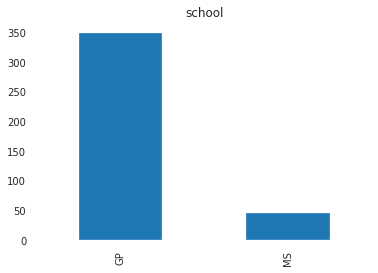

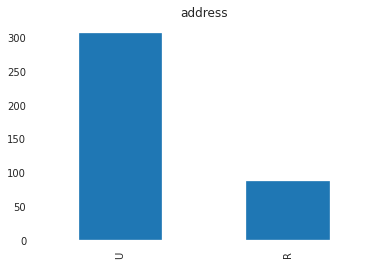

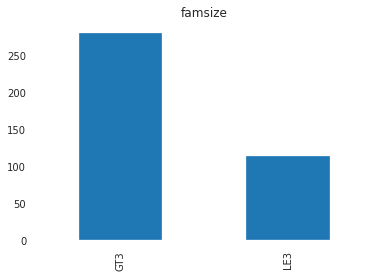

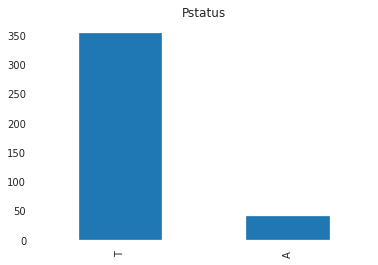

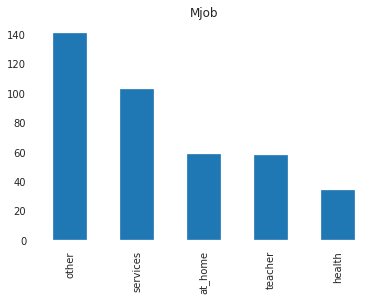

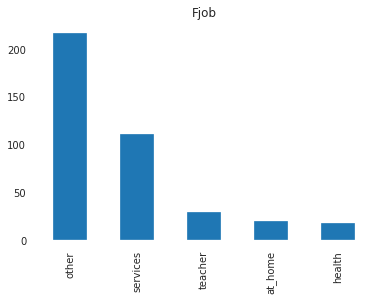

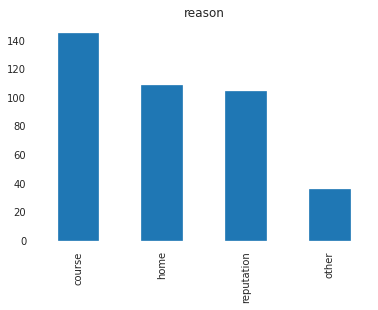

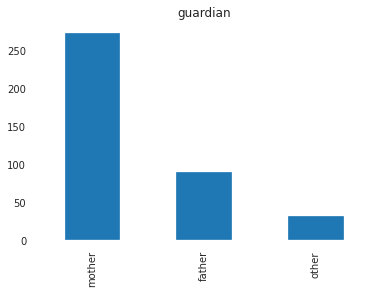

In [82]:
df_categorical = mat.select_dtypes(exclude=[np.number])
for col in df_categorical.columns:
    df_categorical[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

# <div align="center">Exploratory Data Analysis</div>

### What numerical values have the strongest relationship with grades? (mathematics)

**<ul> Strong positive correlation</ul>**
    <li>Planning to pursue a higher education</li>
    <li>Study time</li>
    <li>Mother and father education</li>
    <li>Internet access</li>
**</ul>**
**<ul> Strong negative correlation</ul>**
    <li>Previous failures</li>
    <li>Workday alcohol consumption</li>
    <li>Weekend alcohol consumption</li>
    <li>Travel time</li>
    <li>Free time</li>
    <li>Age</li>
**</ul>**
**<ul> Medium  negative correlation</ul>**
    <li>Health condition</li>
    <li>Absenses</li>
    <li>Romantic relationship</li>
**</ul>**

###  What numerical values have the strongest relationship with number of alcohol consumption? (mathematics)

**<ul> Strong positive correlation</ul>**
    <li>Going out</li>
    <li>Absenses</li>
    <li>Freetime</li>
    <li>Health condition</li>
**</ul>**
**<ul> Strong negative correlation</ul>**
    <li>Study time</li>
    <li>Grades</li>
    <li>Extra educational support</li>
    <li>Family relationship</li>
**</ul>**

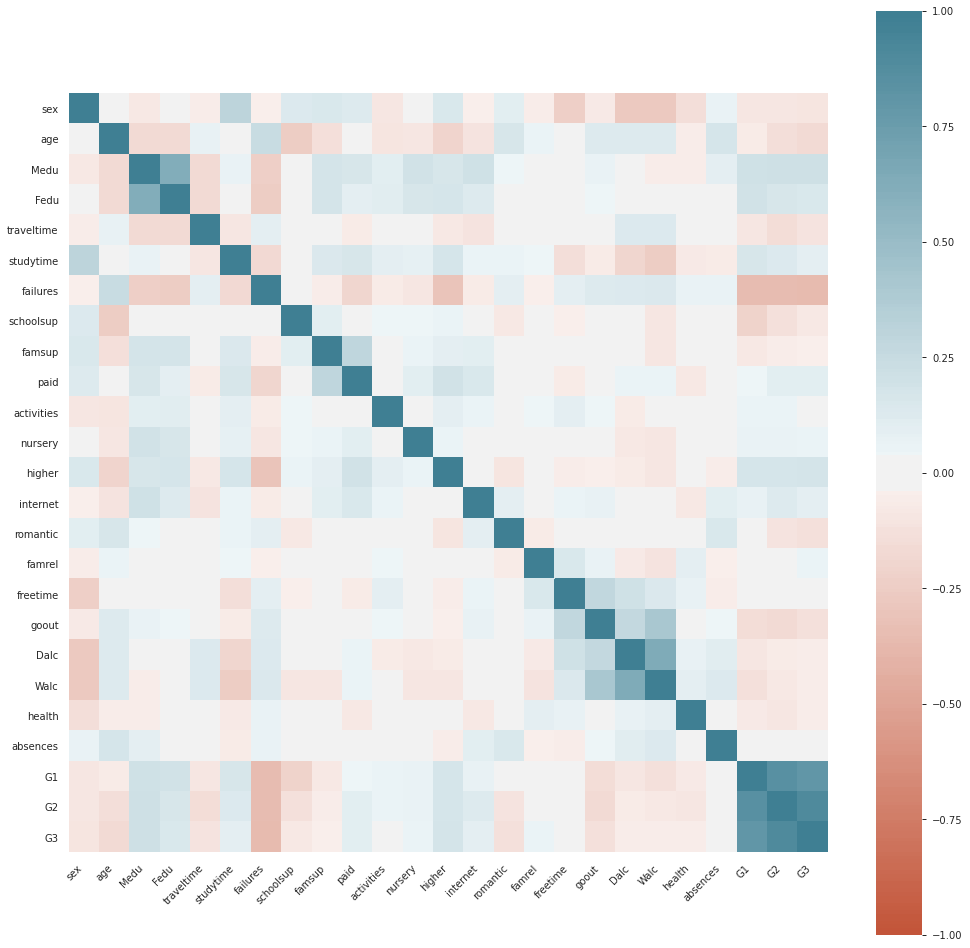

In [83]:
corr = mat.corr()
fig, ax = plt.subplots(figsize=(17,17)) 
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

In [84]:
X = mat.select_dtypes(include=[np.number]).iloc[:, 0:-3]
y = mat.iloc[:,-1]    
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))  

        Specs       Score
21   absences  648.166848
6    failures  140.934898
19       Walc   28.444167
7   schoolsup   28.319018
14   romantic   20.089526
18       Dalc   17.082868
9        paid   16.129900
2        Medu   13.894852
17      goout   10.472494
3        Fedu   10.375563


In [134]:
mat_por = mat.append(por)
mat_por = all_students[all_students["G3"] != 0]
X = mat_por.loc[:, ["Dalc", "failures", "higher", "studytime", "Medu", "goout", "absences"]]
y = mat_por.loc[:, "G3"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [135]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly_test)

In [136]:
rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
r2 = r2_score(y_test,y_poly_pred)
print(rmse)
print(r2)
for t, p in zip(y_test,y_poly_pred):
    print(t, p)

2.5295570923173125
0.2493107104933131
9 12.407847334518662
10 11.521615928650434
11 10.663827993630937
15 12.007215822250908
10 10.327932484695998
8 9.770617187012242
18 12.962482181496856
18 13.388988889654234
16 13.630504330646183
11 14.057781136977496
12 11.836968418340332
11 11.94492502941494
15 14.563695492111211
15 13.591991263893707
14 14.252953546138741
16 12.695831171685873
18 12.053719930298106
8 8.923260433282437
10 13.75311415982512
12 10.159137570255286
4 9.81064272638001
12 11.417524177491732
15 12.257027728276125
11 11.50683098379523
11 9.855392321427924
11 11.981371080711085
8 11.41293247604251
8 9.344530208838918
8 9.75403737383439
17 13.670985421495368
13 13.972773192812905
13 12.14899690379022
14 13.034593312193838
11 12.489249063204221
12 11.641847870252205
14 12.595878119728047
12 11.654896165043388
10 11.624908018759076
11 9.121385013320738
12 9.857595676865479
13 12.50763428687962
12 12.288449512698687
12 12.05099328157945
17 13.25366723606382
9 13.86423559537798

In [254]:
all_students = mat_por.copy()
all_students.loc[all_students["Dalc"] <3, "Dalc"] = 0
all_students.loc[all_students["Dalc"] >= 3, "Dalc"]=1
ones = all_students[all_students["Dalc"]==1]

In [277]:
zeros = all_students[all_students["Dalc"]==0].iloc[0:450,:]
zeros = zeros.append(ones)

In [278]:
X = zeros.loc[:, ["schoolsup", "famrel", "G3", "studytime", "freetime", "goout", "absences"]]
y = zeros.loc[:, "Dalc"]

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/olha/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [280]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [271]:
for t, p in zip(y_test,y_pred):
    print(t, p)

0 1
1 1
0 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 1
0 0
0 0
1 0
1 1
1 1
0 1
0 0
0 0
0 0
0 1
1 1
0 0
0 1
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
1 1
1 0
0 0
0 0
0 0
1 1
1 0
0 0
0 0
1 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
1 1
0 1
0 0
1 0
1 0
1 1
1 0
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 1
0 1
1 1
1 1
0 1
0 0
1 0
0 0


In [305]:
scaler = MaxAbsScaler()
scaled = all_students.loc[:, ["famrel", "G3", "studytime", "freetime", "goout", "absences"]]
df = pd.DataFrame(scaler.fit_transform(scaled), columns=["famrel", "G3", "studytime", "freetime", "goout", "absences"])
values = all_students.loc[:,"schoolsup"].copy()
df.loc[:, "schoolsup"] = values.values
values = mat_por.loc[:,"Dalc"].copy()
df.loc[:, "Dalc"] = values.values
ones = df[df['Dalc']==1].iloc[0:450, :]

In [306]:
one = df['Dalc']==1
df.drop(df[one].index, axis=0, inplace=True)

In [307]:
df = df.append(ones)
df = shuffle(df)

In [308]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Dalc", axis=1), df["Dalc"], test_size=0.3, random_state=42)

In [309]:
sigma = 0.1
gamma = 1/(2* sigma**2)
c = svm.SVC(kernel="linear", gamma=gamma, C=1.0, decision_function_shape='ovr')
c.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [313]:
c.score(X_test, y_test)

0.6

In [314]:
y_pred = c.predict(X_test)

In [315]:
for t, p in zip(y_test,y_pred):
    print(t, p)

1 1
2 1
1 1
3 1
1 1
1 1
1 1
1 1
2 1
1 1
1 1
1 1
2 1
1 1
3 1
3 1
1 1
1 1
1 1
1 1
2 1
2 1
1 1
1 1
1 1
5 1
2 1
2 1
1 1
3 1
1 1
1 1
3 1
2 1
1 1
2 1
1 1
3 1
1 1
1 1
1 1
1 1
2 1
1 1
1 1
2 1
1 1
1 1
1 1
2 1
1 1
5 1
2 1
1 1
1 1
1 1
1 1
5 1
1 1
2 1
2 1
2 1
1 1
1 1
1 1
2 1
1 1
1 1
1 1
2 1
1 1
2 1
1 1
1 1
4 1
2 1
2 1
2 1
2 1
1 1
1 1
2 1
1 1
3 1
3 1
1 1
1 1
4 1
1 1
1 1
1 1
2 1
2 1
1 1
5 1
1 1
5 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
3 1
2 1
1 1
5 1
3 1
1 1
3 1
1 1
1 1
3 1
1 1
1 1
3 1
1 1
1 1
2 1
1 1
1 1
3 1
2 1
1 1
1 1
3 1
3 1
2 1
1 1
2 1
3 1
5 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 1
1 1
1 1
2 1
1 1
1 1
1 1
4 1
1 1
1 1
2 1
1 1
1 1
3 1
1 1
2 1
3 1
2 1
1 1
1 1
1 1
1 1
5 1
1 1
1 1
2 1
3 1
2 1
1 1
1 1
1 1
1 1
1 1
1 1
2 1
1 1
5 1
1 1
2 1
1 1
3 1
2 1
1 1
1 1
2 1
3 1
1 1
1 1
1 1
1 1
3 1
1 1
1 1
2 1
2 1
2 1
4 1
1 1
2 1
2 1
1 1
3 1
5 1
1 1
1 1
3 1
1 1
3 1
1 1
1 1
1 1
1 1
2 1
1 1
1 1
2 1
2 1
